# TP3
### Descripción

Se tiene el siguiente sistema:

![Modulador + Canal](./images/ej03-sistema.png)

Considere un periodo de muestreo de $T_s = \frac{1}{16}\mu\text{s}$ y un
tiempo de símbolo $T_\text{symb}$ de 16 veces $T_s$.

1. Generar un script de *octave*, *python*, *matlab*, o cualquier otro lenguaje
    similar que implemente el sistema.
    - La señal `b` es una secuencia binaria aleatoria.
      Toma los valores `0` y `1` (o alternativamente `-1` y `1`);
    - La señal `d` inserta $M-1$ ceros entre cada bit y luego le asigna un
      `1.0` al bit `1` y un `-1.0` al bit `0` (o `-1`).
      Puede tomar los vaores `-1`, `0` o `1`.
    - El pulso `p` puede tener varias formas:
      1. Pulso cuadrado.
      2. Pulso triangular.
      3. Pulso seno.
      4. Pulso coseno elevado.

          ![Coseno elevado](./images/raised_cosine.png)
    - La señal `x` es la señal a transmitir por el canal, se obtiene mediante la
      convolución entre `d` y `p`, o de manera equivalente realizando el
      filtrado de `d` mediante el filtro FIR de coeficientes `p`.
      En cualquier caso es importante descartar los primeros $\frac{L_p-1}{2}$
      valores, para que las señales `d` y `x` queden "sincronizadas".
    - El filtro `h` representa al canal y en este caso será un canal ideal, es
      decir, tendrá una única delta en 0.
    - La señal `n` representa a ruido blanco gaussiano aditivo (AWGN) del canal.
      Se lo caracterizará por su varianza: $\sigma^2 = N_0$
      (Modulación en banda base).

2. Graficar las señales `d`, `x` y `c` superpuestas en un mismo gráfico.
    Realice el gráfico para cada pulso del punto anterior.
    Verificar que las deltas coinciden con los picos de los pulsos, inclusive
    para el coseno elevado.

3. Graficar la densidad espectral de las señales `x` y `c` del punto anterior
    en escala semilogaritmica.

4. Suba el script a la carpeta de entrega.

5. Complete el archivo `README.md` con los gráficos del punto 2 y 3.

## Enunciado 1
- La señal `b` es una secuencia binaria aleatoria. Toma los valores `0` y `1` (o alternativamente `-1` y `1`);
      
- La señal `d` inserta $M-1$ ceros entre cada bit y luego le asigna un
`1.0` al bit `1` y un `-1.0` al bit `0` (o `-1`).
Puede tomar los vaores `-1`, `0` o `1`.

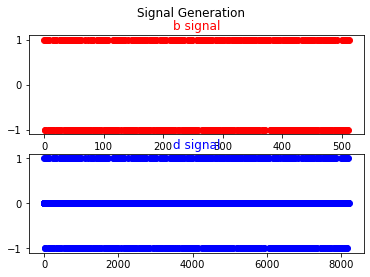

In [1]:
from matplotlib import pyplot as plt
from matplotlib import style
import scipy.signal as sc
import numpy as np
from random import random

len_data = 512
b_signal = (2*(np.random.randint(2, size=len_data)))-1
M=16
d_signal = []
for bit in b_signal:
    d_signal.append(bit)
    d_signal.extend([0] * (M - 1))

f,plt_arr = plt.subplots(2, sharex=False)
f.suptitle('Signal Generation')

plt_arr[0].plot(b_signal, 'o',color ='red')
plt_arr[0].set_title('b signal', color ='red')

plt_arr[1].plot(d_signal, 'o',color ='blue')
plt_arr[1].set_title('d signal', color ='blue')

plt.rcParams["figure.figsize"] = [15,6]
plt.show()


Considere un periodo de muestreo de $T_s = \frac{1}{16}\mu\text{s}$ y un
tiempo de símbolo $T_\text{symb}$ de 16 veces $T_s$.

In [2]:
f = 1/16
t = np.arange(len_data*M) * (f)
print(t)

[0.000000e+00 6.250000e-02 1.250000e-01 ... 5.118125e+02 5.118750e+02
 5.119375e+02]


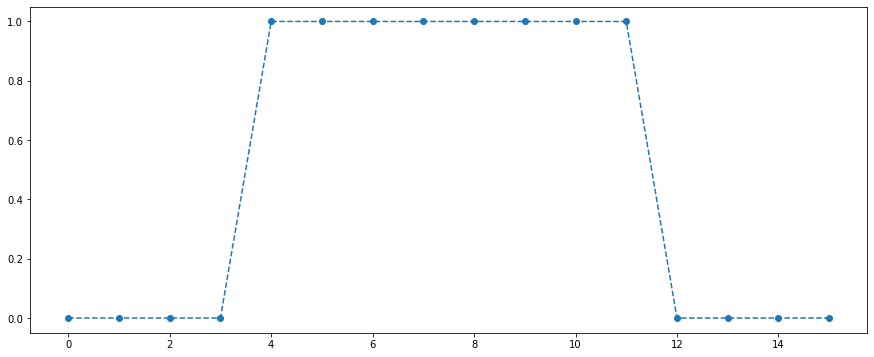

In [3]:
td = np.linspace(0, M, M, endpoint=False)
pulso_cuadrado = (sc.square((2 * np.pi * f * td)+5)+1)/2#cuadrada
plt.plot(pulso_cuadrado, '--o')
plt.rcParams["figure.figsize"] = [10,4]
plt.show()

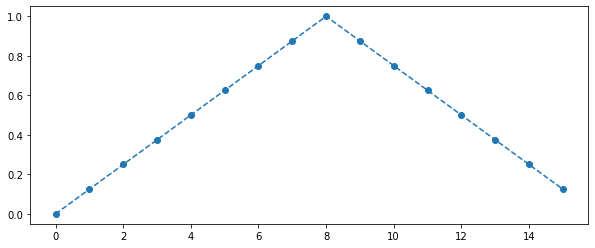

In [4]:
pulso_triangular = (sc.sawtooth(2 * np.pi * f * td, width=0.5)+1)/2 #triangular
plt.plot(td, pulso_triangular, '--o')

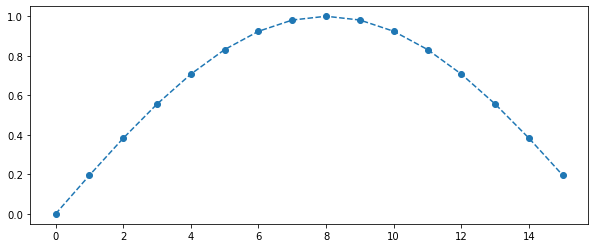

In [5]:
pulso_seno = np.sin((np.pi * f * td)) #senoidal
plt.plot(td, pulso_seno, '--o')

## ahora se calcula el coseno elevado
![Coseno elevado](./images/raised_cosine.png)

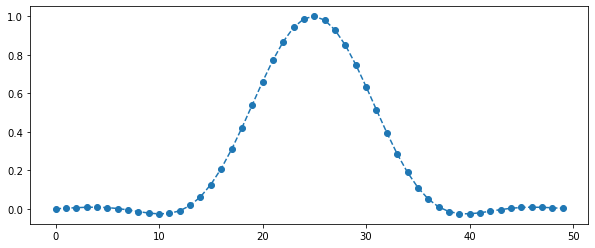

In [6]:
def cose_elev(period, beta, time):
    umbral = period / (2 * beta)
    beta_time = beta * time
    if (time == umbral) or (time == -umbral):
        return (np.pi / (4 * period)) * np.sinc(1/(beta * 2))
    else:
        b = (1 / period)*(np.sinc((time / period)))
        c = (np.cos((np.pi * beta_time) / period))/(1 - ((2 * beta_time) / period)**2)
        return b * c

pulso_coseno_elev = []
range_ = 2*M
td = np.linspace(-range_, range_ - 1)# remember it's not inclusive of final number
for bit in td:
    pulso_coseno_elev.append(cose_elev(1,1,bit/M))
plt.plot(pulso_coseno_elev, '--o')
plt.show()

La señal `x` es la señal a transmitir por el canal, se obtiene mediante la
      convolución entre `d` y `p`, o de manera equivalente realizando el
      filtrado de `d` mediante el filtro FIR de coeficientes `p`.
      En cualquier caso es importante descartar los primeros $\frac{L_p-1}{2}$
      valores, para que las señales `d` y `x` queden "sincronizadas".
      
El filtro h representa al canal y en este caso será un canal ideal, es decir, tendrá una única delta en 0.

In [7]:
h_signal = np.zeros(M)
h_signal[0] = 1

In [8]:
def noise(amp):
    return amp * (random() - 0.5)

### filtro cuadrado.

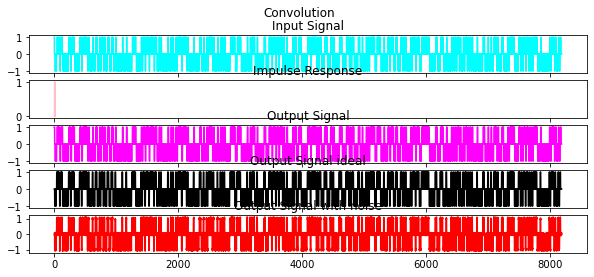

In [9]:
pulso_cuadrado_conv = sc.convolve(d_signal,pulso_cuadrado, mode='same')

pulso_cuadrado_ide_conv = sc.convolve(pulso_cuadrado_conv,h_signal, mode='same')
noise_cuadrada = []
for b_c in pulso_cuadrado_ide_conv:
    noise_cuadrada.append(b_c + noise(0.20))
    
f,plt_arr = plt.subplots(5,sharex=True)
f.suptitle("Convolution")
plt_arr[0].plot(d_signal, color ='cyan')
plt_arr[0].set_title("Input Signal")
plt_arr[1].plot(pulso_cuadrado, color ='pink')
plt_arr[1].set_title("Impulse Response")
plt_arr[2].plot(pulso_cuadrado_conv, color ='magenta')
plt_arr[2].set_title("Output Signal")
plt_arr[3].plot(pulso_cuadrado_ide_conv, color ='black')
plt_arr[3].set_title("Output Signal ideal")

plt_arr[4].plot(noise_cuadrada, color ='red')
plt_arr[4].set_title("Output Signal with noise")
plt.rcParams["figure.figsize"] = [15,6]
plt.show()

### Filtro triangular

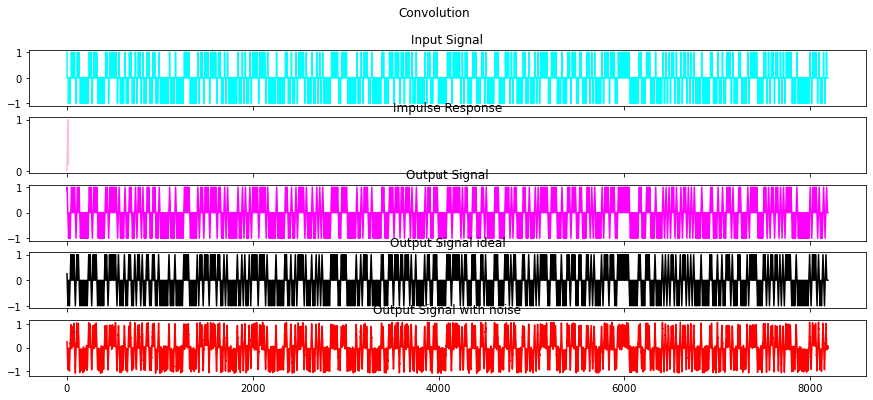

In [11]:
pulso_triangular_conv = sc.convolve(d_signal,pulso_triangular, mode='same')

pulso_triangular_ide_conv = sc.convolve(pulso_triangular_conv,h_signal, mode='same')

noise_triangular = []
for b_t in pulso_triangular_ide_conv:
    noise_triangular.append(b_t + noise(0.20))

f,plt_arr = plt.subplots(5,sharex=True)
f.suptitle("Convolution")
plt_arr[0].plot(d_signal, color ='cyan')
plt_arr[0].set_title("Input Signal")
plt_arr[1].plot(pulso_triangular, color ='pink')
plt_arr[1].set_title("Impulse Response")
plt_arr[2].plot(pulso_triangular_conv, color ='magenta')
plt_arr[2].set_title("Output Signal")
plt_arr[3].plot(pulso_triangular_ide_conv, color ='black')
plt_arr[3].set_title("Output Signal ideal")
plt_arr[4].plot(noise_triangular, color ='red')
plt_arr[4].set_title("Output Signal with noise")
plt.rcParams["figure.figsize"] = [15,6]
plt.show()

### filro seno

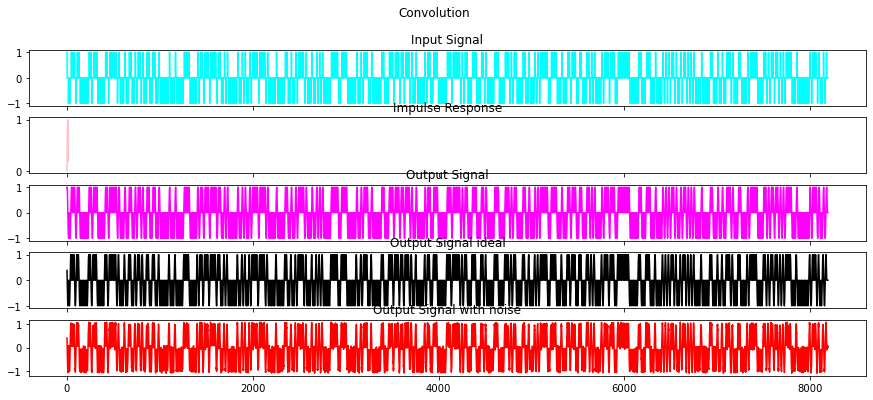

In [12]:
pulso_seno_conv = sc.convolve(d_signal,pulso_seno, mode='same')
pulso_seno_ide_conv = sc.convolve(pulso_seno_conv,h_signal, mode='same')

noise_seno = []
for b_t in pulso_seno_ide_conv:
    noise_seno.append(b_t + noise(0.20))
    
f,plt_arr = plt.subplots(5,sharex=True)
f.suptitle("Convolution")
plt_arr[0].plot(d_signal, color ='cyan')
plt_arr[0].set_title("Input Signal")
plt_arr[1].plot(pulso_seno, color ='pink')
plt_arr[1].set_title("Impulse Response")
plt_arr[2].plot(pulso_seno_conv, color ='magenta')
plt_arr[2].set_title("Output Signal")
plt_arr[3].plot(pulso_seno_ide_conv, color ='black')
plt_arr[3].set_title("Output Signal ideal")
plt_arr[4].plot(noise_seno, color ='red')
plt_arr[4].set_title("Output Signal with noise")
plt.rcParams["figure.figsize"] = [15,6]
plt.show()

### filtro coseno elevado

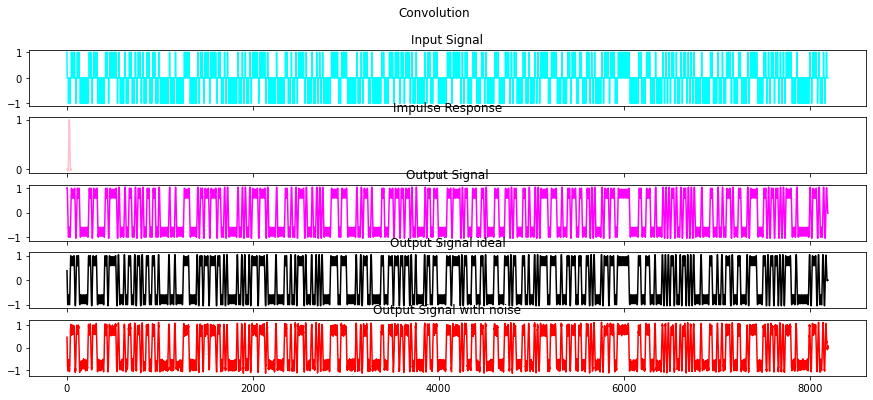

In [13]:
pulso_coseno_elev_conv = sc.convolve(d_signal,pulso_coseno_elev, mode='same')

pulso_coseno_elev_ide_conv = sc.convolve(pulso_coseno_elev_conv,h_signal, mode='same')

noise_coseno = []
for b_t in pulso_coseno_elev_ide_conv:
    noise_coseno.append(b_t + noise(0.20))
    
f,plt_arr = plt.subplots(5,sharex=True)
f.suptitle("Convolution")
plt_arr[0].plot(d_signal, color ='cyan')
plt_arr[0].set_title("Input Signal")
plt_arr[1].plot(pulso_coseno_elev, color ='pink')
plt_arr[1].set_title("Impulse Response")
plt_arr[2].plot(pulso_coseno_elev_conv, color ='magenta')
plt_arr[2].set_title("Output Signal")
plt_arr[3].plot(pulso_coseno_elev_ide_conv, color ='black')
plt_arr[3].set_title("Output Signal ideal")
plt_arr[4].plot(noise_coseno, color ='red')
plt_arr[4].set_title("Output Signal with noise")
plt.rcParams["figure.figsize"] = [15,6]
plt.show()

## Densidad

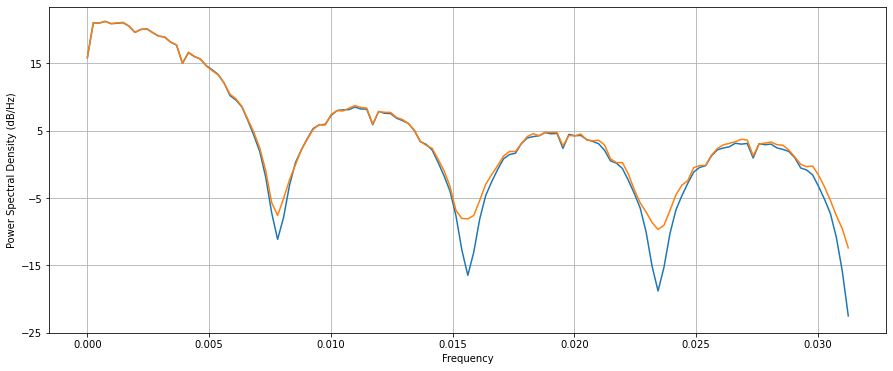

In [14]:
plt.psd(pulso_cuadrado_ide_conv,Fs=1/M)
plt.psd(noise_cuadrada,Fs=1/M)
plt.show()

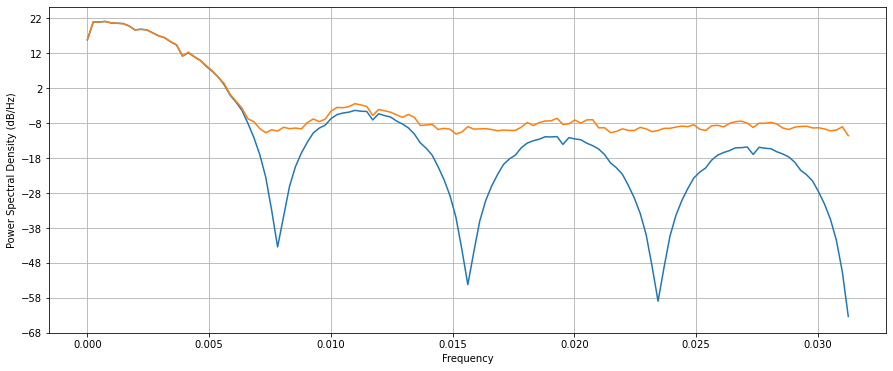

In [15]:
plt.psd(pulso_triangular_ide_conv,Fs=1/M)
plt.psd(noise_triangular,Fs=1/M)
plt.show()

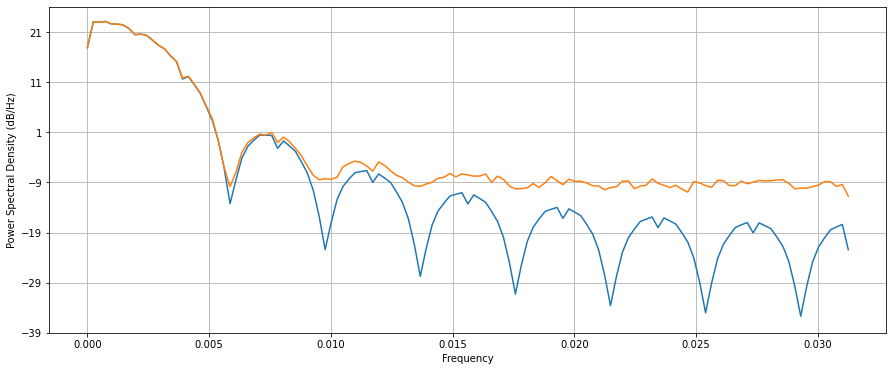

In [16]:
plt.psd(pulso_seno_ide_conv,Fs=1/M)
plt.psd(noise_seno,Fs=1/M)
plt.show()

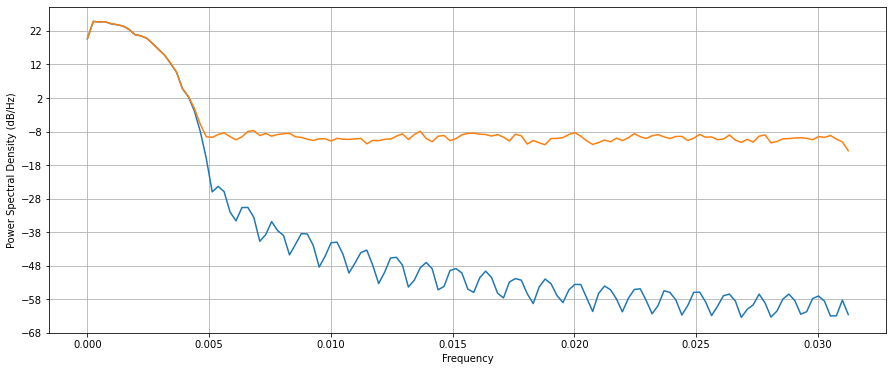

In [18]:
plt.psd(pulso_coseno_elev_ide_conv,Fs=1/M)
plt.psd(noise_coseno,Fs=1/M)
plt.show()